Radosław Jadach - projekt zaliczeniowy Bootcamp Data Science - cześć 1, przygotowanie danych

**Przewidywanie wzięcia pożyczki.** 

Celem projektu jest zastosowanie modeli klasyfikacji (binarnej) do
przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku.
Link do danych:
https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv

### Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import danych

In [2]:
# data = pd.read_csv('Dane/HappyCustomerBank/Train_nyOWmfK.csv', encoding="latin1")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

url = 'https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv'
data = pd.read_csv(url,
                delimiter = ',',
                encoding = "latin1")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [4]:
data.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,200000.0,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,10,HBXX,920000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,17,HBXX,500000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [5]:
# usuwamy kolumnę LoggedIn - zgodnie z poleceniem       
data.drop('LoggedIn', axis=1, inplace=True)

Przechodzimy przez kolejne zmienne, stosując ewentualne przekształcenia/modyfikacje.

Tworzymy kontener na zmienne kategoryczne

In [6]:
zmienne_kategoryczne = []

## **ID**

In [7]:
#zmienna do usunięcia, numer identyfikacyjny, bez wpływu na dane
data.drop('ID', axis=1, inplace=True)

# **Gender**

In [8]:
data['Gender'].isna().sum()

0

In [9]:
data['Gender'].value_counts()

Male      49848
Female    37172
Name: Gender, dtype: int64

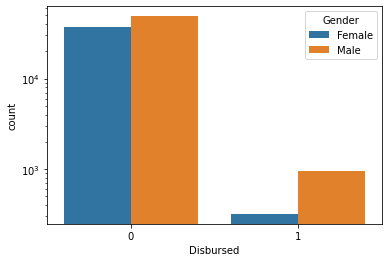

In [10]:
sns.countplot(x='Disbursed', hue='Gender', data=data)
plt.yscale('log')

In [11]:
# Braków nie ma, zmieniamy na female=1, male=0
data['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

# City

In [12]:
data['City'].isna().sum()

1003

In [13]:
# Braki opisujemy jako "Brak danych"
data['City'].fillna('Brak danych', inplace=True)

In [14]:
# Sprawdzamy ile jest unikalnych miast
data['City'].nunique()

698

In [15]:
# sprawdzamy ile jest rekordów w pierwszych 5/10/15... miastach - szukamy progu odcięcia
for i in range(0,50,5):
    print(f"{i} największych miast stanowi {sum(data['City'].value_counts().iloc[:i])} co stanowi {100 * sum(data['City'].value_counts().iloc[:i]) / sum(data['Gender'].value_counts()):0.4}%")


0 największych miast stanowi 0 co stanowi 0.0%
5 największych miast stanowi 48334 co stanowi 55.54%
10 największych miast stanowi 60760 co stanowi 69.82%
15 największych miast stanowi 65487 co stanowi 75.26%
20 największych miast stanowi 68783 co stanowi 79.04%
25 największych miast stanowi 71256 co stanowi 81.88%
30 największych miast stanowi 72945 co stanowi 83.83%
35 największych miast stanowi 74212 co stanowi 85.28%
40 największych miast stanowi 75188 co stanowi 86.4%
45 największych miast stanowi 75971 co stanowi 87.3%


In [16]:
# Sprawdzamy 15 największych - 75% całości
data['City'].value_counts().iloc[:15]

Delhi          12527
Bengaluru      10824
Mumbai         10795
Hyderabad       7272
Chennai         6916
Pune            5207
Kolkata         2888
Ahmedabad       1788
Jaipur          1331
Gurgaon         1212
Coimbatore      1147
Brak danych     1003
Thane            905
Chandigarh       870
Surat            802
Name: City, dtype: int64

In [17]:
# Wsród 15 największych jest nasza pozycja - "Brak danych". Mapujemy więc miasta do "Brak danych" według liczności (czyli 11)
top_11_cities = data['City'].value_counts().index[:11].tolist()
top_11_cities

['Delhi',
 'Bengaluru',
 'Mumbai',
 'Hyderabad',
 'Chennai',
 'Pune',
 'Kolkata',
 'Ahmedabad',
 'Jaipur',
 'Gurgaon',
 'Coimbatore']

In [18]:
def przypisz_miasto(city):
    if city in top_11_cities:
        return city
    else:
        return 'Pozostałe'

data['City'] = data['City'].apply(przypisz_miasto)

In [19]:
# Flagujemy według liczności, "Pozostałe" jako 0, reszta rosnąco (czyli Delhi = 11)
data['City'].value_counts().iloc[:12]

Pozostałe     25113
Delhi         12527
Bengaluru     10824
Mumbai        10795
Hyderabad      7272
Chennai        6916
Pune           5207
Kolkata        2888
Ahmedabad      1788
Jaipur         1331
Gurgaon        1212
Coimbatore     1147
Name: City, dtype: int64

In [20]:
data['City'].replace({'Pozostałe':0, 'Coimbatore':1, 'Gurgaon':2,
                        'Jaipur':3, 'Ahmedabad':4, 'Kolkata':5,
                        'Pune':6, 'Chennai':7, 'Hyderabad':8,
                        'Mumbai':9, 'Bengaluru':10, 'Delhi':11},
                       inplace=True)

# Monthly_Income

In [22]:
data['Monthly_Income'].isna().sum()

0

In [23]:
data['Monthly_Income'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
80%      4.500000e+04
90%      6.200000e+04
95%      9.500000e+04
96%      1.000000e+05
97%      1.200000e+05
98%      1.600000e+05
99%      2.500000e+05
max      4.445544e+08
Name: Monthly_Income, dtype: float64

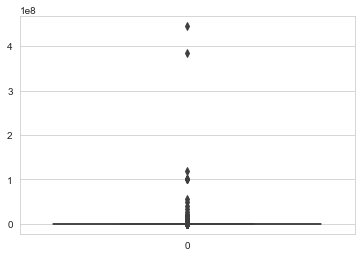

In [24]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Monthly_Income'], orient = 'v')
# ax.set(yscale="log")

Przyglądając się wartością percentyli i wykresowi widać, że wartości powyżej 98 centyla można uznać za odstające.
Jako takie nadpisujemy je wartością mediany

In [25]:
mediana = np.median(data['Monthly_Income'])
mediana

centyl_98 = np.percentile(a = data['Monthly_Income'], q = 98)
centyl_98

data.loc[data['Monthly_Income'] > centyl_98 , 'Monthly_Income'] = mediana

In [26]:
data['Monthly_Income'].describe()

count     87020.000000
mean      30878.123719
std       22695.152159
min           0.000000
25%       16500.000000
50%       25000.000000
75%       37525.000000
max      160000.000000
Name: Monthly_Income, dtype: float64

<AxesSubplot:>

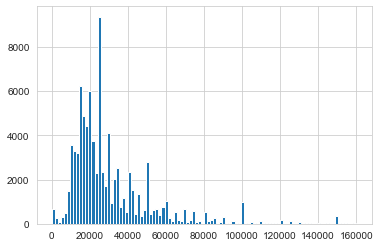

In [27]:
data['Monthly_Income'].hist(bins=100)

In [28]:
data['Monthly_Income'].skew()

2.222776453054362

In [29]:
# Mamy dość wysoką skośność - robimy pierwiastek 3 stopnia
data['Monthly_Income'] = np.cbrt(data['Monthly_Income'])

<AxesSubplot:>

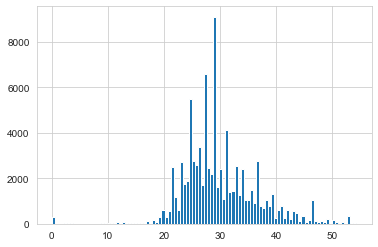

In [30]:
data['Monthly_Income'].hist(bins=100)

In [31]:
data['Monthly_Income'].skew()

0.36799105366125945

**DOB & Lead_Creation_Date = nowa zmienna Age**

In [32]:
data['DOB'].isna().sum()

0

In [33]:
# z daty urodzenia wyciągamy rok urodzenia. Łącząc z datą Leadu otrzymamy wiek
data['YOB'] = data['DOB'].apply(lambda date: int(date[-2:]))

In [34]:
data['YOB'].describe()

count    87020.000000
mean        84.095829
std          7.147194
min         15.000000
25%         81.000000
50%         86.000000
75%         89.000000
max         97.000000
Name: YOB, dtype: float64

In [35]:
data['YOB'] += 1900

In [36]:
data['Lead_Creation_Date'].isna().sum()

0

In [37]:
# z daty leadu wyciągamy rok
data['LY'] = data['Lead_Creation_Date'].apply(lambda date: int(date[-2:]))

In [38]:
data['LY'].describe()

count    87020.0
mean        15.0
std          0.0
min         15.0
25%         15.0
50%         15.0
75%         15.0
max         15.0
Name: LY, dtype: float64

In [39]:
data['LY'] += 2000

In [40]:
data['Age'] = data['LY'] - data['YOB']
data['Age'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    87020.000000
mean        30.904171
std          7.147194
min         18.000000
25%         26.000000
50%         29.000000
75%         34.000000
80%         35.000000
90%         40.000000
95%         46.000000
96%         47.000000
97%         49.000000
98%         52.000000
99%         55.000000
max        100.000000
Name: Age, dtype: float64

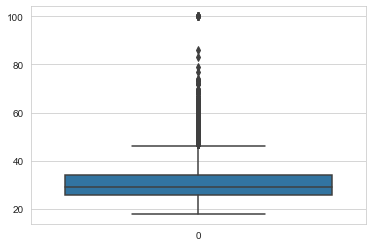

In [41]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Age'], orient = 'v')
# ax.set(yscale="log")

Wiek przekraczający 80 można traktować jak odstający. Pytanie gdzie ustawić granicę?
Za punkt odcięcia przyjmuję 65 lat - wiek emerytalny (zakładam, że w Indiach jest tak samo)
Wartości odstające nadpisujemy medianą

In [42]:
mediana = np.median(data['Age'])
mediana

data.loc[data['Age'] > 65 , 'Age'] = mediana

In [43]:
data['Age'].describe()

count    87020.000000
mean        30.876189
std          7.042601
min         18.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         65.000000
Name: Age, dtype: float64

In [44]:
data['Age'].skew()

1.4353920104538036

In [45]:
# I znów mamy skosność przekraczającą 1. Próbujemy log
data['Age'] = np.log(data['Age'])

In [46]:
data['Age'].skew()

0.7629285335469895

In [47]:
# Usuwam zbędne kolumny, tj. DOB, Lead_Creation_Date, LY, 
data.drop('DOB', axis=1, inplace=True)
data.drop('Lead_Creation_Date', axis=1, inplace=True)
data.drop('LY', axis=1, inplace=True)
data.drop('YOB', axis=1, inplace=True)

# Loan_Amount_Applied & Loan_Amount_Submitted & Tenor & EMI Submitted

In [48]:
# Zmienne powinny być ze sobą powiązane. Robię prosty przegląd

In [49]:
data['Loan_Amount_Applied'].isna().sum(), data['Loan_Amount_Submitted'].isna().sum(),\
data['Loan_Tenure_Applied'].isna().sum(), data['Loan_Tenure_Submitted'].isna().sum(), \
data['EMI_Loan_Submitted'].isna().sum()

(71, 34613, 71, 34613, 59294)

In [50]:
data[data['Loan_Amount_Applied']==0]['Loan_Amount_Applied'].count(), \
data[data['Loan_Amount_Submitted']==0]['Loan_Amount_Submitted'].count(), \
data[data['Loan_Tenure_Applied']==0]['Loan_Tenure_Applied'].count(), \
data[data['Loan_Tenure_Submitted']==0]['Loan_Tenure_Submitted'].count(), \
data[data['EMI_Loan_Submitted']==0]['EMI_Loan_Submitted'].count()

(28853, 0, 33844, 0, 0)

In [51]:
data[data['Loan_Amount_Applied']==0]['Disbursed'].sum(), \
data[data['Loan_Amount_Submitted']==0]['Disbursed'].sum(), \
data[data['Loan_Tenure_Applied']==0]['Disbursed'].sum(), \
data[data['Loan_Tenure_Submitted']==0]['Disbursed'].sum(), \
data[data['EMI_Loan_Submitted']==0]['Disbursed'].sum()

(277, 0, 328, 0, 0)

In [52]:
data[(data['Loan_Tenure_Applied']==0) & (data['Loan_Amount_Submitted'].isna())]['Disbursed'].sum(), \
data[(data['Loan_Tenure_Applied']==0) & (data['Loan_Amount_Submitted']==0)]['Disbursed'].sum(), \
data[(data['Loan_Tenure_Applied']==0) & (data['Loan_Amount_Submitted']>0)]['Disbursed'].sum()

(23, 0, 305)

In [53]:
data[(data['Loan_Amount_Applied']==0) & (data['Loan_Amount_Submitted'].isna())]['Disbursed'].sum(), \
data[(data['Loan_Amount_Applied']==0) & (data['Loan_Amount_Submitted']==0)]['Disbursed'].sum(), \
data[(data['Loan_Amount_Applied']==0) & (data['Loan_Amount_Submitted']>0)]['Disbursed'].sum()

(11, 0, 266)

Xmienne dotyczące kwoty/okresu/raty wnioskowanej/udzielonej powinny być zależne.
1. Obserwujemy bardzo dużo braków, szczególnie dla pozycji dotyczącej raty - tutaj potrzebne będzie obejście - nie będziemy patrzeć na kwoty tylko ustawimy 0/1 , gdzie 0 = brak raty/danych, 1 - jest rata z tym, że dla kwoty udzielonej>0 ta pozycja będzie miała wartość 1 (jest kredyt, musi być rata)

1a. Najchętniej usunąłbym tą kolumnę z modelu ze względu na ilość braków
2. Braki dla pozycji "udzielonych" można interpretować jako brak przyznanania, tym bardziej, że zmienna wynikowa zawsze ma tam wartość 0 i dodatkowo brak pozycji o wartości 0
3. Wnioskowane wartości = 0 i przyznane pożyczki - w pierwszym odruchu wydaje się błędne (i faktycznie może tak być dla przypadków, gdy jednocześnie kwota udzielona jest brakiem)
    Jednak w przypadku pozostałych jest to możliwe - ktoś nie wiem jaką ma zdolność, Bank wylicza i daje możliwość przyznania

In [54]:
data[(data['EMI_Loan_Submitted'].isna()) & (data['Loan_Amount_Submitted']>0)]['Disbursed'].sum()

453

In [55]:
# zaczynamy od uzupełniania braków "0"
data['Loan_Amount_Applied'].fillna(0, inplace=True)
data['Loan_Amount_Submitted'].fillna(0, inplace=True)
data['Loan_Tenure_Applied'].fillna(0, inplace=True)
data['Loan_Tenure_Submitted'].fillna(0, inplace=True)
data['EMI_Loan_Submitted'].fillna(0, inplace=True)

In [56]:
data[(data['Loan_Amount_Applied']<data['Loan_Amount_Submitted']) & (data['Loan_Amount_Applied']!=0)]

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Age
45,0,0,31.072325,500000.0,5.0,0.0,BHUSHAN STEEL LTD,State Bank of India,Y,11,HAXA,600000.0,5.0,13.99,12000.0,13957.84,N,Web-browser,B,S133,4,0,3.401197
182,1,10,29.161995,100000.0,3.0,3000.0,DESIGN IMAGE EDU ZONE,ICICI Bank,Y,3,HBXC,170000.0,3.0,20.00,1700.0,6317.81,N,Web-browser,B,S133,4,0,3.713572
287,1,0,31.072325,200000.0,3.0,0.0,EAST COAST RAILWAY,State Bank of Hyderabad,Y,10,HAXA,400000.0,4.0,16.50,5000.0,11438.80,Y,Web-browser,E,S133,5,0,3.688879
349,0,9,31.072325,500000.0,5.0,0.0,CREATIVE PORTICO INDIA PVT LTD,ICICI Bank,Y,11,HAYT,520000.0,5.0,15.75,10400.0,12576.42,N,Web-browser,B,S159,4,0,3.663562
504,0,7,31.072325,300000.0,0.0,0.0,RAPID CARE TRANSCRIPTION PVT LTD,Axis Bank,Y,11,HAZD,420000.0,3.0,17.00,8400.0,14974.15,Y,Web-browser,B,S133,5,0,3.663562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86542,0,0,35.276718,500000.0,4.0,6382.0,MANIPAL TECHNOLOGIES LTD,ICICI Bank,Y,9,HBXC,570000.0,4.0,16.20,5700.0,16212.41,Y,Web-browser,G,S122,5,0,3.401197
86686,0,8,29.240177,100000.0,1.0,6086.0,CLARKE ENERGY INDIA PVT LTD,Axis Bank,Y,11,HAYT,130000.0,2.0,15.75,2600.0,6349.69,N,Web-browser,G,S122,3,0,3.555348
86773,0,9,34.842833,600000.0,5.0,0.0,GGOVERNMENT OF INDIA CUSTOMS DUTY,IDBI Bank,Y,0,HBXA,760000.0,4.0,13.99,3800.0,20764.31,N,Mobile,G,S122,1,0,3.295837
86807,0,10,35.568933,200000.0,5.0,0.0,APOLLO FIEGE INTEGRATED LOGISTICS PVT LTD,Yes Bank,Y,14,HAXC,250000.0,5.0,15.25,5000.0,5980.34,Y,Web-browser,G,S122,5,0,3.465736


In [57]:
# ^^Czy kwota przyznana może być wyższa od wnioskowanej? Tak, bo to jest propozycja - klient może wziąć mniej

In [58]:
# EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI
# EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI
# EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI # EMI

def rata(data):
    if (data['EMI_Loan_Submitted']==0):
        if (data['Loan_Amount_Submitted'] > 0):
            return 1 # gdy rata = 0 i kwota udzielona > 0
        else:
            return 0 # gdy rata = 0 i kwota udzielona = 0
    else:
        if (data['Loan_Amount_Submitted'] > 0):
            return 1 # gdy rata > 0 i kwota udzielona > 0
        else:
            return 0 # gdy rata > 0 i kwota udzielona = 0
        
data['EMI_Loan_Submitted'] = data.apply(rata, axis=1)


# data[(data['EMI_Loan_Submitted']==0) & (data['Loan_Amount_Submitted']==0)].count()

In [59]:
data['EMI_Loan_Submitted'].value_counts()

1    52407
0    34613
Name: EMI_Loan_Submitted, dtype: int64

In [60]:
#Loan_Amount_Applied #Loan_Amount_Applied #Loan_Amount_Applied
#Loan_Amount_Applied #Loan_Amount_Applied #Loan_Amount_Applied
#Loan_Amount_Applied #Loan_Amount_Applied #Loan_Amount_Applied

data['Loan_Amount_Applied'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    8.702000e+04
mean     2.300628e+05
std      3.541233e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+05
75%      3.000000e+05
80%      3.000000e+05
90%      5.000000e+05
95%      1.000000e+06
96%      1.000000e+06
97%      1.000000e+06
98%      1.000000e+06
99%      1.500000e+06
max      1.000000e+07
Name: Loan_Amount_Applied, dtype: float64

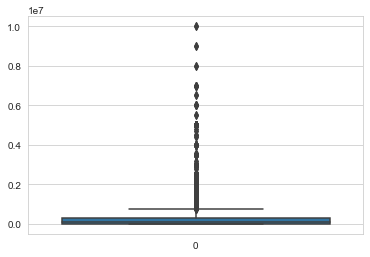

In [61]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Loan_Amount_Applied'], orient = 'v')
# ax.set(yscale="log")

In [62]:
# Z wykresu odczytujemy wartości skrajne - zamieniamy je na medianę
data[data['Loan_Amount_Applied']>=1e7*0.7]['Loan_Amount_Applied']

414       7000000.0
1006      7000000.0
13961     7000000.0
15257     9000000.0
22030     8000000.0
25238     7000000.0
28308     8000000.0
37795     7000000.0
40965     7000000.0
47129     7000000.0
49016     9000000.0
69577     9999999.0
78498    10000000.0
Name: Loan_Amount_Applied, dtype: float64

In [63]:
mediana = np.median(data['Loan_Amount_Applied'])
mediana

data.loc[data['Loan_Amount_Applied'] >= 1e7*0.7 , 'Loan_Amount_Applied'] = mediana

In [64]:
data['Loan_Amount_Applied'].skew()

4.491769366801673

In [65]:
# Skośność!
data['Loan_Amount_Applied'] = np.sqrt(data['Loan_Amount_Applied'])

In [66]:
data['Loan_Amount_Applied'].skew()

0.7335099919162662

In [67]:
#Loan_Amount_Submitted #Loan_Amount_Submitted #Loan_Amount_Submitted
#Loan_Amount_Submitted #Loan_Amount_Submitted #Loan_Amount_Submitted
#Loan_Amount_Submitted #Loan_Amount_Submitted #Loan_Amount_Submitted

data['Loan_Amount_Submitted'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    8.702000e+04
mean     2.378915e+05
std      3.075717e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+05
75%      3.600000e+05
80%      4.300000e+05
90%      5.600000e+05
95%      9.000000e+05
96%      1.000000e+06
97%      1.000000e+06
98%      1.200000e+06
99%      1.500000e+06
max      3.000000e+06
Name: Loan_Amount_Submitted, dtype: float64

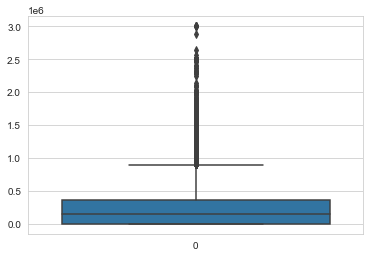

In [68]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Loan_Amount_Submitted'], orient = 'v')
# ax.set(yscale="log")

In [69]:
# Z wykresu odczytujemy wartości skrajne - zamieniamy je na medianę
data[data['Loan_Amount_Submitted']>=1e6*2.7]['Loan_Amount_Submitted']

55069    3000000.0
64648    3000000.0
76073    3000000.0
76175    3000000.0
79360    3000000.0
79371    3000000.0
82164    3000000.0
83985    2880000.0
Name: Loan_Amount_Submitted, dtype: float64

In [70]:
mediana = np.median(data['Loan_Amount_Submitted'])
mediana

data.loc[data['Loan_Amount_Submitted'] >= 1e6*2.7 , 'Loan_Amount_Submitted'] = mediana

In [71]:
data['Loan_Amount_Submitted'].skew()

2.058883371932514

In [72]:
# Skośność
data['Loan_Amount_Submitted'] = np.sqrt(data['Loan_Amount_Submitted'])

In [73]:
data['Loan_Amount_Submitted'].skew()

0.41501896337906014

In [74]:
#Loan_Tenure_Applied #Loan_Tenure_Applied #Loan_Tenure_Applied
#Loan_Tenure_Applied #Loan_Tenure_Applied #Loan_Tenure_Applied
#Loan_Tenure_Applied #Loan_Tenure_Applied #Loan_Tenure_Applied

data['Loan_Tenure_Applied'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    87020.000000
mean         2.129660
std          2.014291
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
80%          5.000000
90%          5.000000
95%          5.000000
96%          5.000000
97%          5.000000
98%          5.000000
99%          5.000000
max         10.000000
Name: Loan_Tenure_Applied, dtype: float64

In [75]:
data['Loan_Tenure_Applied'].skew()

0.2659930783488817

In [76]:
#Loan_Tenure_Submitted #Loan_Tenure_Submitted #Loan_Tenure_Submitted
#Loan_Tenure_Submitted #Loan_Tenure_Submitted #Loan_Tenure_Submitted
#Loan_Tenure_Submitted #Loan_Tenure_Submitted #Loan_Tenure_Submitted

data['Loan_Tenure_Submitted'].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

count    87020.000000
mean         2.343542
std          2.108391
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
80%          5.000000
90%          5.000000
95%          5.000000
96%          5.000000
97%          5.000000
98%          5.000000
99%          5.000000
max          6.000000
Name: Loan_Tenure_Submitted, dtype: float64

In [77]:
data['Loan_Tenure_Submitted'].skew()

0.011483245901374187

<AxesSubplot:>

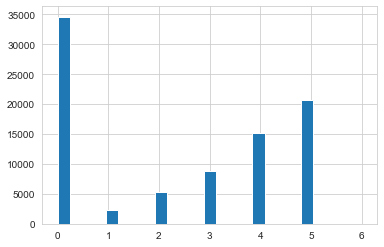

In [78]:
# Niemal idealnie symetryczny rozkład - czy na pewno?
data['Loan_Tenure_Submitted'].hist(bins=25)

In [79]:
# Trochę inaczej wyobrażam sobie symetrię :) Nie zmieniamy mimo wszystko

## Existing_EMI

In [80]:
data['Existing_EMI'].isna().sum()

71

In [81]:
data['Existing_EMI'].fillna(0, inplace=True)

In [82]:
data['Existing_EMI'].describe()

count    8.702000e+04
mean     3.693212e+03
std      3.979411e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

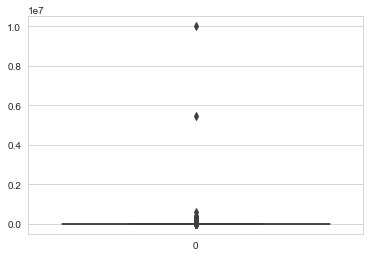

In [83]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Existing_EMI'], orient = 'v')
# ax.set(yscale="log")

In [84]:
# usuwamy wartości skrajne i w tym wypadku zastępujemy średnią (mediana ma wartość 0)
srednia = np.mean(data['Existing_EMI'])
srednia

data.loc[data['Existing_EMI'] >= 1e7*0.2 , 'Existing_EMI'] = srednia

In [85]:
data['Existing_EMI'].skew()

11.13920697824036

In [88]:
# bardzo wysoka wartość - spójrzmy na dane jeszcze raz
data['Existing_EMI'].describe()

count     87020.000000
mean       3515.701385
std        9684.843624
min           0.000000
25%           0.000000
50%           0.000000
75%        3500.000000
max      626266.000000
Name: Existing_EMI, dtype: float64

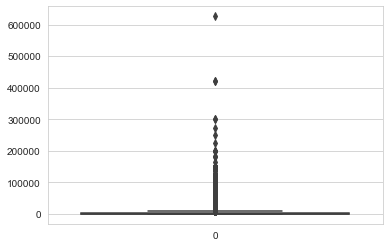

In [89]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Existing_EMI'], orient = 'v')
# ax.set(yscale="log")

In [90]:
# I jeszcze raz usuwamy wartości skrajne i w tym wypadku zastępujemy średnią (mediana wciąż ma wartość 0)
srednia = np.mean(data['Existing_EMI'])
srednia

data.loc[data['Existing_EMI'] >= 350000 , 'Existing_EMI'] = srednia

In [91]:
data['Existing_EMI'].skew()

7.212359041858263

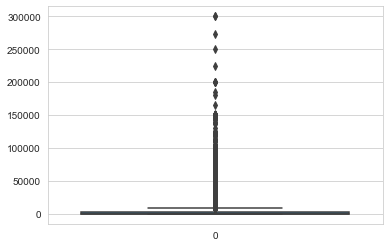

In [92]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Existing_EMI'], orient = 'v')
# ax.set(yscale="log")

In [93]:
# Wartości odstające już nie rażą aż tak, według wyliczeń mamy ciągle skośność - próbujemy wyprowadzić
data['Existing_EMI'] = np.log(data['Existing_EMI']+1)

In [94]:
data['Existing_EMI'].skew()

0.7878576969023722

<AxesSubplot:>

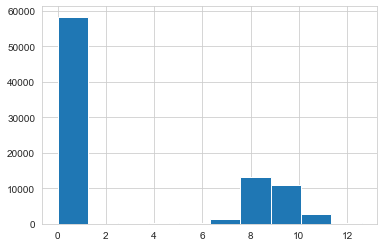

In [95]:
data['Existing_EMI'].hist()

## Employer_Name

In [96]:
data['Employer_Name'].isna().sum()

71

In [97]:
data['Employer_Name'].fillna('Brak danych', inplace=True)

In [98]:
data['Employer_Name'].nunique()

43568

In [99]:
# Mamy niemal 44k unikalnych rekordów. Spróbujmy pogrupować po tych, które dostają najwięcej pożyczek

work = data.groupby(['Employer_Name'])['Disbursed'].sum()
work = work.sort_values(ascending=False)
work.sort_values(ascending=False)[:20]

Employer_Name
TATA CONSULTANCY SERVICES LTD (TCS)              21
ACCENTURE SERVICES PVT LTD                       12
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     10
GENPACT                                           7
HCL TECHNOLOGIES LTD                              7
INDIAN RAILWAY                                    7
CIPLA LTD                                         5
TCS AND ASSOCIATES PVT LTD                        5
HCL AVITAS PVT LTD                                5
0                                                 5
OTHERS                                            5
IBM GLOBAL SERVICES INDIA LTD                     5
BSNL                                              4
DR REDDYS LABORATORIES LTD                        4
HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD     4
CAPGEMINI INDIA PVT LTD                           4
HCL - HEWLETT-PACKARD LTD                         4
IDEA CELLULAR LTD                                 4
ERICSSON INDIA GLOBAL SERVICES PVT LTD            

In [101]:
# Dzielimy na 10 grup według liczby przyznań
employer_sums = data.groupby('Employer_Name')['Disbursed'].sum()

employer_name_mapping_dict = dict(pd.cut(employer_sums,
                                    bins=10,
                                    labels=range(1,11)))

employer_name_mapping_dict

{' ': 1,
 '  ': 1,
 '    ': 1,
 '  ADLER MEDIEQUIP PVT LTD': 1,
 '  MN&C SUPPLY LINKS RETAIL PVT. LTD': 1,
 '  RAJSHREE SUGARS CHEMICALS LTD': 1,
 ' 6 IR BATTALION': 1,
 ' A O SMITH': 1,
 ' AASHISH SURENDRA SHUKLA ': 1,
 ' AMAZON DEVELOPMENT CENTER INDIA PVT LTD': 1,
 ' ANI TECHNOLOGIES': 1,
 ' APPU STEEL  FURNICHER': 1,
 ' ASCENT STAFFING SOLUTIONS PRIVATE LIMITED': 1,
 ' BASE INFORMATION MANAGEMENT PVT LTD': 1,
 ' C G MARKETING ': 1,
 ' C INDRA SENA REDDY': 1,
 ' CAPITAL GROUP MIDLAND CREDIT MANAGEMENT INDIA PVT LTD': 1,
 ' CHARKU SAHU': 1,
 ' CTA APPARELS PVT LTD': 1,
 ' DELHI DISASTER MANAGEMENT AUTHORITY': 1,
 ' DINESH YADAV': 1,
 ' DIVYA NEXTGEN ENGICON PVT LTD': 1,
 ' EDUCATION DEPARTMENT': 1,
 ' EDUCATION DEPT.': 1,
 ' G H RAISONI POLYTECHNC': 1,
 ' GEETA DAS': 1,
 ' GKFSPL': 1,
 ' GOVERNMENT JOB': 1,
 ' GOVT CONTRACT': 1,
 ' GOVT OF INDIA': 1,
 ' GOVT. OF ODISHA': 1,
 ' GRANTEBAL HIGHSCHOOL KOLHAPUR': 1,
 ' HANUMAN MAHADEV GAURAV': 1,
 ' HARISH H K ': 1,
 ' INDIAN ARMY': 1,
 '

In [102]:
# Słownikiem zastępujemy wszsytkie wartości w kolumnie
data['Employer_Name'] = data['Employer_Name'].replace(employer_name_mapping_dict)

In [103]:
data['Employer_Name'].value_counts()

1     78138
3      5302
2      1743
4       559
10      550
5       404
6       324
Name: Employer_Name, dtype: int64

## Salary_Account

In [104]:
data['Salary_Account'].isna().sum()

11764

In [105]:
data['Salary_Account'].fillna('Brak danych', inplace=True)

In [106]:
data['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Brak danych                                        11764
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank           

In [107]:
# 10 najliczniejszych banków zostawimy, resztę wrzucę do jednego koszyka
top_10_accounts = data['Salary_Account'].value_counts().index[:11].tolist() # 11 bo jest nasz kategoria "Brak danych"
top_10_accounts

['HDFC Bank',
 'ICICI Bank',
 'State Bank of India',
 'Brak danych',
 'Axis Bank',
 'Citibank',
 'Kotak Bank',
 'IDBI Bank',
 'Punjab National Bank',
 'Bank of India',
 'Bank of Baroda']

In [108]:
top_10_accounts.remove('Brak danych')

In [109]:
def przypisz_rachunek(rachunek):
    if rachunek in top_10_accounts:
        return rachunek
    else:
        return 'Pozostałe'

data['Salary_Account'] = data['Salary_Account'].apply(przypisz_rachunek)

In [110]:
data['Salary_Account'].value_counts()

Pozostałe               25573
HDFC Bank               17695
ICICI Bank              13636
State Bank of India     11843
Axis Bank                8783
Citibank                 2376
Kotak Bank               2067
IDBI Bank                1550
Punjab National Bank     1201
Bank of India            1170
Bank of Baroda           1126
Name: Salary_Account, dtype: int64

In [111]:
zmienne_kategoryczne.append('Salary_Account')

## Mobile_Verified

In [112]:
data['Mobile_Verified'].isna().sum()

0

In [113]:
data['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

In [114]:
data['Mobile_Verified'].replace({'Y':1, 'N':0}, inplace=True)

## Var5 & Var1

In [115]:
data['Var5'].isna().sum(), data['Var1'].isna().sum()

(0, 0)

In [116]:
data['Var5'].value_counts(), data['Var1'].value_counts()

(0     29087
 1     12236
 3      6759
 11     5204
 2      4485
 14     3662
 15     3509
 12     2989
 13     2622
 8      2515
 10     2427
 9      2281
 16     2097
 4      1815
 17     1691
 7      1489
 6       983
 5       975
 18      194
 Name: Var5, dtype: int64,
 HBXX    59294
 HBXC     9010
 HBXB     4479
 HAXA     2909
 HBXA     2123
 HAXB     2011
 HBXD     1964
 HAXC     1536
 HBXH      970
 HCXF      722
 HAYT      508
 HAVC      384
 HAXM      268
 HCXD      237
 HCYS      217
 HVYS      186
 HAZD      109
 HCXG       78
 HAXF       15
 Name: Var1, dtype: int64)

In [ ]:
# Var5 zostawiamy, Var1 - 8 największych mapujemy na liczby (powyżej 1k)

In [117]:
top_8_var = data['Var1'].value_counts().index[:8].tolist()
top_8_var

['HBXX', 'HBXC', 'HBXB', 'HAXA', 'HBXA', 'HAXB', 'HBXD', 'HAXC']

In [118]:
def przypisz_wage(zmienna):
    if zmienna in top_8_var:
        return zmienna
    else:
        return 0
    
data['Var1'] = data['Var1'].apply(przypisz_wage)

In [119]:
data['Var1'].replace({'HBXX':8, 'HBXC':7,'HBXB':6, 'HAXA':5,
                        'HBXA':4, 'HAXB':3,'HBXD':2, 'HAXC':1}, 
                              inplace=True)

In [120]:
data['Var1'].value_counts()

8    59294
7     9010
6     4479
0     3694
5     2909
4     2123
3     2011
2     1964
1     1536
Name: Var1, dtype: int64

## Interest_Rate

In [121]:
data['Interest_Rate'].isna().sum()

59294

In [122]:
data['Interest_Rate'].describe()

count    27726.000000
mean        19.197474
std          5.834213
min         11.990000
25%         15.250000
50%         18.000000
75%         20.000000
max         37.000000
Name: Interest_Rate, dtype: float64

In [123]:
# Ze zmiennej najchętniej bym zrezygnował. Niestety nie wolno.... czyli standardowo - nany = 0
data['Interest_Rate'].fillna(0, inplace=True)

<AxesSubplot:>

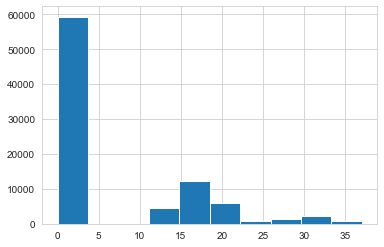

In [125]:
data['Interest_Rate'].hist(bins=10)

In [126]:
data['Interest_Rate'].skew()

1.2393442340179288

In [127]:
# Nie mam pomysłu na zmienną. Zastępują ją informacją, czy oprocentowanie jest czy go nie ma.
def czy_oprocentowanie(oprocentowanie):
    if oprocentowanie>0:
        return 1
    else:
        return 0

data['Interest_Rate'] = data['Interest_Rate'].apply(czy_oprocentowanie)

In [128]:
data['Interest_Rate'].value_counts()

0    59294
1    27726
Name: Interest_Rate, dtype: int64

## Processing_Fee

In [129]:
data['Processing_Fee'].isna().sum()

59600

In [130]:
data['Processing_Fee'].describe()

count    27420.000000
mean      5131.150839
std       4725.837644
min        200.000000
25%       2000.000000
50%       4000.000000
75%       6250.000000
max      50000.000000
Name: Processing_Fee, dtype: float64

Tutaj sytuacja wygląda podobnie jak wyżej - duża liczba braków. Tutaj jednak spróbujemy trochę innego podejścia, tzn. nan=0 ale przyjrzymy się pozostałych wartością - tak na intuicję wydaje się, że zmienna może być ważniejsza od poprzedniej

In [131]:
data['Processing_Fee'].fillna(0, inplace=True)

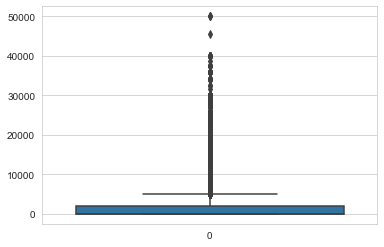

In [132]:
sns.set_style("whitegrid")
ax = sns.boxplot(data = data['Processing_Fee'], orient = 'v')

In [133]:
data['Processing_Fee'].skew()

3.838063512032092

In [134]:
# logarytmujemy
data['Processing_Fee']=np.log(data['Processing_Fee']+1)

In [135]:
data['Processing_Fee'].skew()

0.8399572583359103

## Filled_Form

In [136]:
data['Filled_Form'].isna().sum()

0

In [137]:
data['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [138]:
data['Filled_Form'].replace({'Y':1, 'N':0}, inplace=True)

## Device_Type

In [139]:
data['Device_Type'].isna().sum()

0

In [140]:
data['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [141]:
data.groupby(['Device_Type'])['Disbursed'].mean()

Device_Type
Mobile         0.011628
Web-browser    0.015688
Name: Disbursed, dtype: float64

In [142]:
data.groupby(['Device_Type'])['Disbursed'].sum()

Device_Type
Mobile          264
Web-browser    1009
Name: Disbursed, dtype: int64

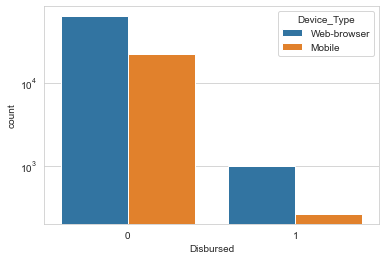

In [143]:
sns.countplot(x='Disbursed', hue='Device_Type', data=data)
plt.yscale('log')

In [144]:
# Web ma więcej 1 (4x); ma też jednak więcej rekordów (3x) - średnia też wkazuje przewagę - mapuję na 0/1
data['Device_Type'].replace({'Web-browser':1, 'Mobile':0}, inplace=True)

## Var2

In [145]:
data['Var2'].isna().sum()

0

In [146]:
data['Var2'].value_counts()

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [147]:
# mapujemy na wartości liczbowe
data['Var2'].replace({'B':6, 'G':5,'C':4, 'E':3, 'D':2, 'F':1, 'A':0}, inplace=True)

## Source

In [148]:
data['Source'].isna().sum()

0

In [149]:
data['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      650
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S138        3
S139        3
S129        3
S136        3
S135        2
S125        1
S130        1
S154        1
S140        1
Name: Source, dtype: int64

In [150]:
# Wybieramy pierwsze 7 (1k+) i nadajemy rangi, dla pozostałych 0
top_7_sources = data['Source'].value_counts().index[:7].tolist()
top_7_sources

def source_flg(source):
    if source in top_7_sources:
        return source
    else:
        return 0

data['Source'] = data['Source'].apply(source_flg)


In [151]:
data['Source'].value_counts()

S122    38567
S133    29885
S159     5599
S143     4332
0        3681
S127     1931
S137     1724
S134     1301
Name: Source, dtype: int64

In [152]:
data['Source'].replace({'S122':7, 'S133':6,'S159':5, 'S143':4, 'S127':3, 'S137':2, 'S134':1}, inplace=True)

## Var4

In [153]:
data['Var4'].isna().sum()

0

In [154]:
data['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87020 non-null  int64  
 1   City                   87020 non-null  int64  
 2   Monthly_Income         87020 non-null  float64
 3   Loan_Amount_Applied    87020 non-null  float64
 4   Loan_Tenure_Applied    87020 non-null  float64
 5   Existing_EMI           87020 non-null  float64
 6   Employer_Name          87020 non-null  int64  
 7   Salary_Account         87020 non-null  object 
 8   Mobile_Verified        87020 non-null  int64  
 9   Var5                   87020 non-null  int64  
 10  Var1                   87020 non-null  int64  
 11  Loan_Amount_Submitted  87020 non-null  float64
 12  Loan_Tenure_Submitted  87020 non-null  float64
 13  Interest_Rate          87020 non-null  int64  
 14  Processing_Fee         87020 non-null  float64
 15  EM

In [156]:
# zmienne kategoryczne
data = pd.get_dummies(data=data, columns=zmienne_kategoryczne, drop_first=True)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               87020 non-null  int64  
 1   City                                 87020 non-null  int64  
 2   Monthly_Income                       87020 non-null  float64
 3   Loan_Amount_Applied                  87020 non-null  float64
 4   Loan_Tenure_Applied                  87020 non-null  float64
 5   Existing_EMI                         87020 non-null  float64
 6   Employer_Name                        87020 non-null  int64  
 7   Mobile_Verified                      87020 non-null  int64  
 8   Var5                                 87020 non-null  int64  
 9   Var1                                 87020 non-null  int64  
 10  Loan_Amount_Submitted                87020 non-null  float64
 11  Loan_Tenure_Submitted       

In [158]:
data.head(15)

,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed,Age,Salary_Account_Bank of Baroda,Salary_Account_Bank of India,Salary_Account_Citibank,Salary_Account_HDFC Bank,Salary_Account_ICICI Bank,Salary_Account_IDBI Bank,Salary_Account_Kotak Bank,Salary_Account_Pozostałe,Salary_Account_Punjab National Bank,Salary_Account_State Bank of India
0,1,11,27.144176,547.722558,5.0,0.000000,1,0,0,8,0.000000,0.0,0,0.000000,0,0,1,5,7,1,0,3.610918,0,0,0,1,0,0,0,0,0,0
1,0,9,32.710663,447.213595,2.0,0.000000,10,1,13,4,447.213595,2.0,1,0.000000,1,0,1,5,7,3,0,3.401197,0,0,0,0,1,0,0,0,0,0
2,0,0,28.231081,774.596669,4.0,0.000000,1,1,0,8,670.820393,4.0,0,0.000000,1,0,1,6,4,1,0,3.526361,0,0,0,0,0,0,0,0,0,1
3,0,0,32.710663,1000.000000,5.0,0.000000,1,1,10,8,959.166305,5.0,0,0.000000,1,0,1,6,4,3,0,3.332205,0,0,0,0,0,0,0,0,0,1
4,0,10,46.415888,707.106781,2.0,10.126671,1,1,17,8,707.106781,2.0,0,0.000000,1,0,1,6,1,3,0,3.433987,0,0,0,1,0,0,0,0,0,0
5,0,10,35.568933,547.722558,5.0,9.615872,5,1,17,0,547.722558,5.0,1,7.313887,1,0,1,6,4,3,0,3.496508,0,0,0,0,0,0,0,1,0,0
6,1,0,41.212853,2.449490,5.0,0.000000,1,0,0,8,0.000000,0.0,0,0.000000,0,0,1,6,6,1,0,3.332205,0,0,0,0,0,0,0,1,0,0
7,0,10,27.144176,447.213595,5.0,7.862497,1,1,3,8,447.213595,5.0,0,0.000000,1,0,1,6,5,3,0,3.688879,0,0,0,0,0,0,0,1,0,0
8,0,0,42.171633,0.000000,0.0,0.000000,1,1,13,3,1140.175425,5.0,1,10.165890,1,1,0,4,7,5,0,3.761200,0,0,0,0,0,0,0,0,0,1
9,1,9,31.072325,547.722558,3.0,0.000000,1,1,0,7,547.722558,3.0,1,7.313887,1,0,1,6,6,1,0,3.258097,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Gdyby nie założenia, przynajmniej dwie kolumny zostały by odrzucone (Interest, Fee) oraz niektóre wartości zostały usunięte

In [159]:
# Zapisujemy dataset
data.to_csv('data_clean') 